In [1]:
from pandas import read_csv, DataFrame
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.cross_validation import train_test_split
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import explained_variance_score as r2
import numpy as np
from sklearn.metrics import roc_curve, auc


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dataset = read_csv('step2.csv',',')
dataset.head()
dataset.describe()

,A,B,C,D,E,R
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,5.240000,5.12500,5.085000,4.640000,4.630000,12.899000
std,3.251965,3.20166,3.285077,3.086752,3.165946,8.766674
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.350000
25%,2.750000,2.00000,2.000000,2.000000,2.000000,6.550000
50%,5.000000,5.00000,5.000000,4.000000,4.000000,10.800000
75%,8.000000,8.00000,8.000000,7.000000,7.000000,18.100000
max,10.000000,10.00000,10.000000,10.000000,10.000000,40.350000


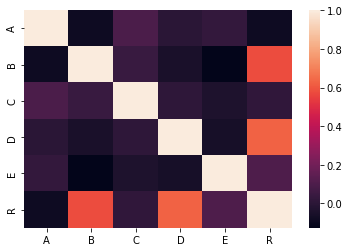

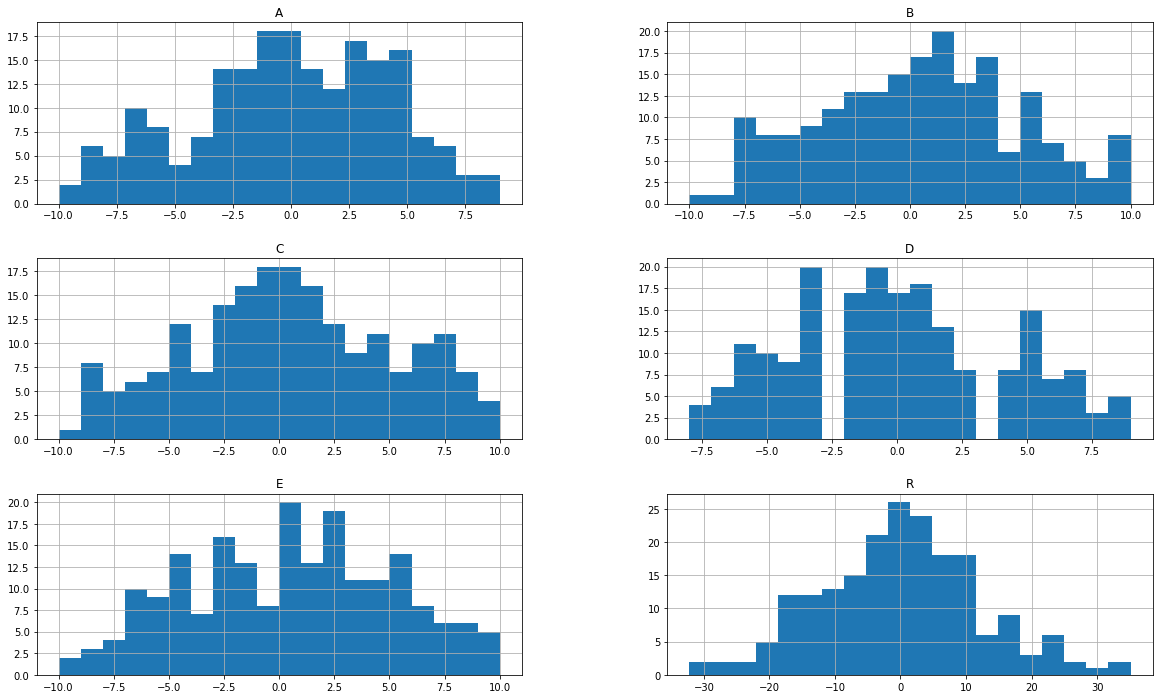

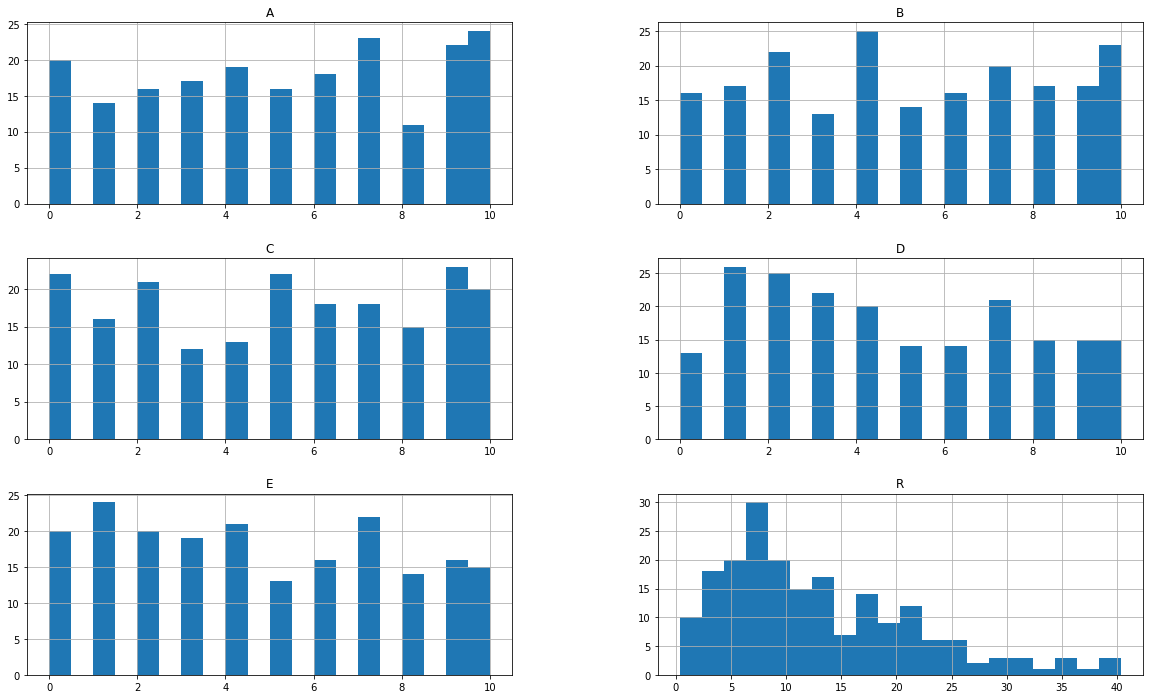

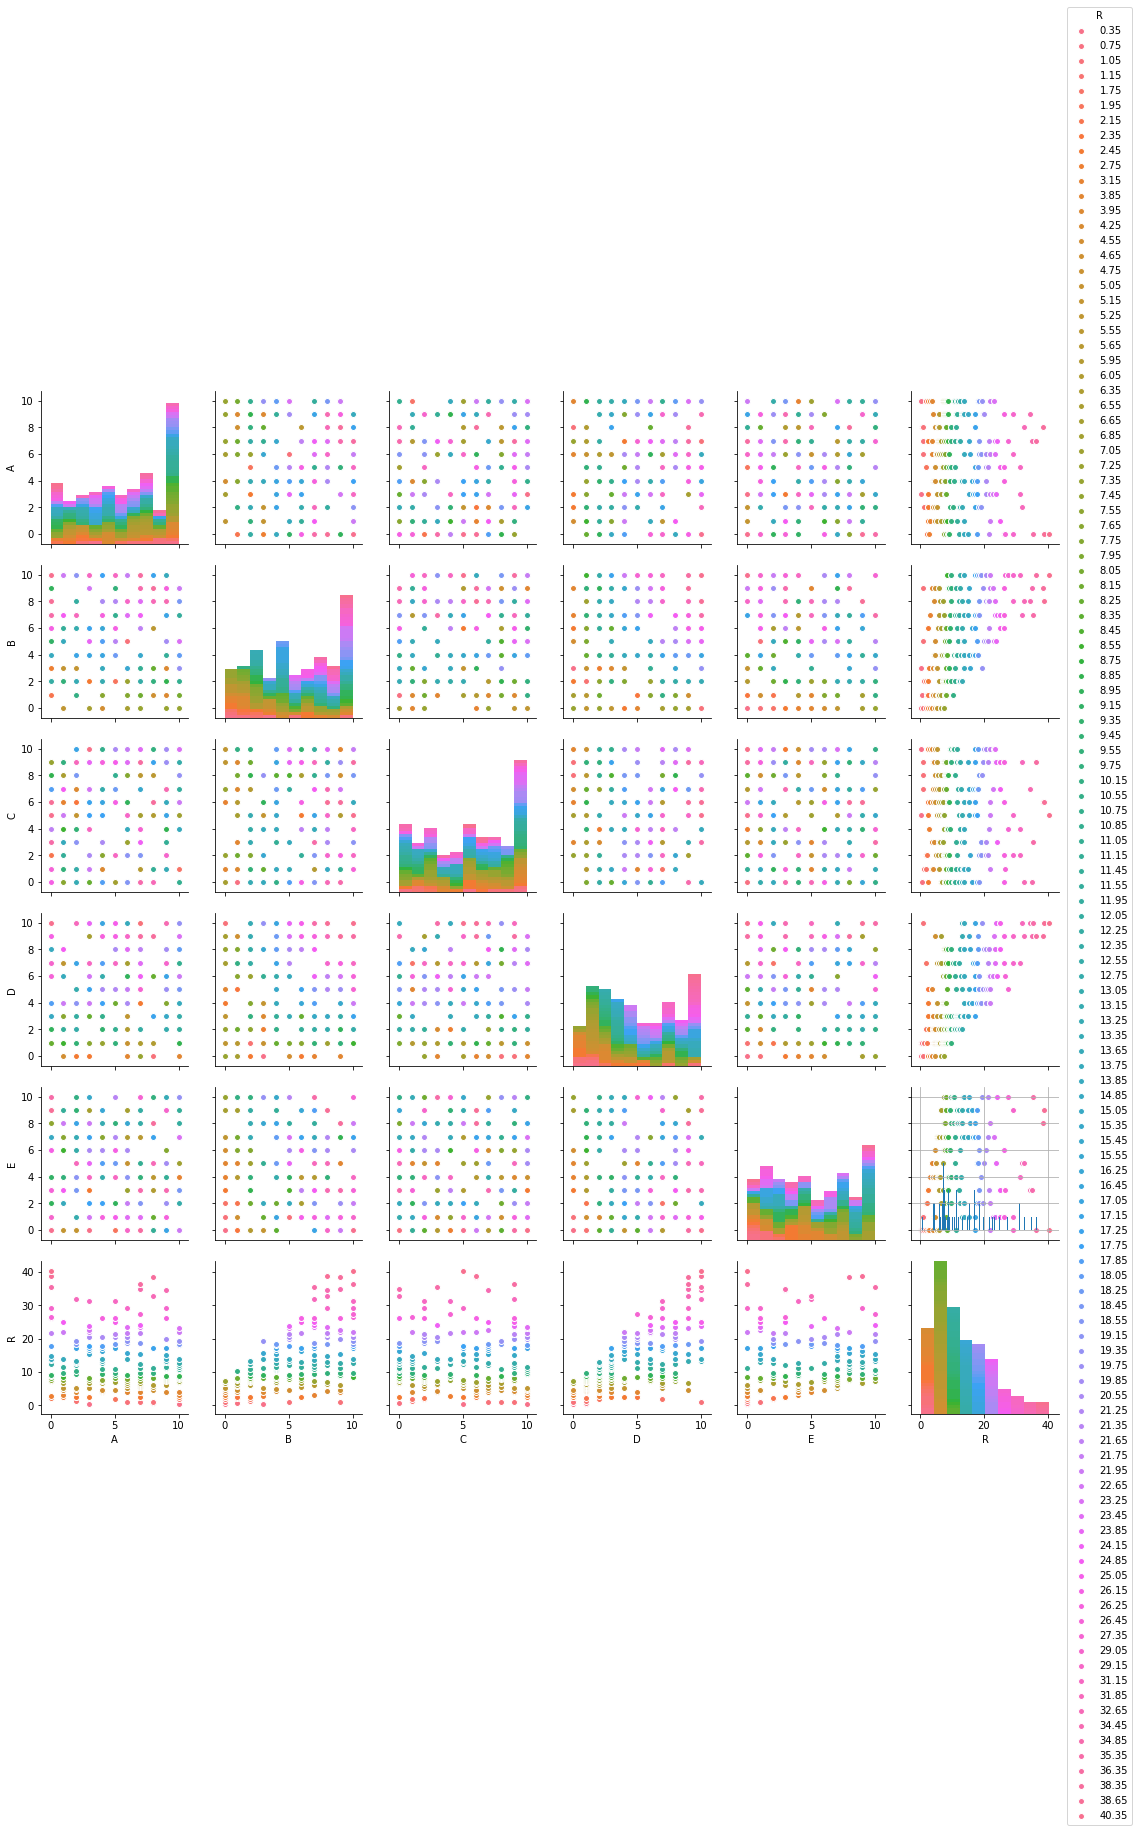

In [3]:
# тепловая карта корреляции показателей,для наглядности и гистограмы для визуальной оценки данных.
sns.heatmap(dataset.corr())
# как мы видим из тепловой карты на R  влияют в основном B,D, немного веса есть у E. 
# Между собой показатели почти не коррелируют.

dataset.diff().hist(bins=20,figsize=(20,12))
dataset.hist(bins=20,figsize=(20,12))


# dataset.plot(kind='kde', linewidth=3);
# dataset.plot(dataset[['B','D','E']], dataset[['R']], style='o')
sns.pairplot(dataset, hue='R')
dataset.R.hist(bins=500)

In [4]:
# из таблицы видно, что показатель веса выбранных параметров в сумме высокий, а значит проверка прошла успешно. 
# Можно начинать выбор и построение модели. 

trg = dataset[['R']]
arr=[]
y=max(dataset['R'].values)
for x in dataset['R'].values:
    print(x)
    s=(x*100)/y
    print(s)
    z=int(round(s))
    print(z)
    arr.append(z)
print(arr)
# метод главных компонент для улучшения выборки.
coder = PCA(n_components=3)
trn = coder.fit_transform(dataset[['B','D','E']])


                A          B           C           D           E           R
count  200.000000  200.00000  200.000000  200.000000  200.000000  200.000000
mean     5.240000    5.12500    5.085000    4.640000    4.630000   12.899000
std      3.251965    3.20166    3.285077    3.086752    3.165946    8.766674
min      0.000000    0.00000    0.000000    0.000000    0.000000    0.350000
25%      2.750000    2.00000    2.000000    2.000000    2.000000    6.550000
50%      5.000000    5.00000    5.000000    4.000000    4.000000   10.800000
75%      8.000000    8.00000    8.000000    7.000000    7.000000   18.100000
max     10.000000   10.00000   10.000000   10.000000   10.000000   40.350000
                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                  

In [6]:
# делим выборку пополам для проверки моделей.
Xtrn, Xtest, Ytrn, Ytest, Ztrn, Ztest = train_test_split(trn, trg, arr, test_size=0.5)

In [7]:
# проверяем показатели деревьев регрессии
for depth in range (2,20,1):
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(Xtrn, Ytrn.values[:,0])
    print ('R^2 for ',depth,' depth: ', r2_score(Ytest.values[:,0], model.predict(Xtest)))

# plt.figure(figsize=(10, 6))
# plt.plot(Xtest, f(Xtest), "b")
# plt.scatter(Xtrn, Ytrn, c="b", s=20)
# plt.plot(Xtest, model.predict(Xtest), "g", lw=2)
# plt.xlim([-5, 5])
# plt.title("Decision tree regressor, MSE = %.2f" % np.sum((Ytest - model.predict(Xtest)) ** 2))
# plt.show()

R^2 for  2  depth:  0.6863133375734067
R^2 for  3  depth:  0.7821890240282143
R^2 for  4  depth:  0.8178931736567501
R^2 for  5  depth:  0.8392910566347729
R^2 for  6  depth:  0.8492625238049534
R^2 for  7  depth:  0.8607439301904302
R^2 for  8  depth:  0.8558972932706337
R^2 for  9  depth:  0.8644658899650448
R^2 for  10  depth:  0.8709939197602121
R^2 for  11  depth:  0.8629946519263194
R^2 for  12  depth:  0.8638393524534991
R^2 for  13  depth:  0.8589915561219665
R^2 for  14  depth:  0.8633650738788121
R^2 for  15  depth:  0.8740011459539694
R^2 for  16  depth:  0.8693149043680722
R^2 for  17  depth:  0.867275852685659
R^2 for  18  depth:  0.878097712718297
R^2 for  19  depth:  0.8553738837822011


In [8]:
for estimators in range (2,200,20):
    model = RandomForestRegressor(n_estimators=estimators, max_features ='sqrt')
    model.fit(Xtrn, Ytrn.values[:,0])
    print ('R^2 for ',estimators,' depth: ', r2_score(Ytest.values[:,0], model.predict(Xtest)))

R^2 for  2  depth:  0.6634133810556821
R^2 for  22  depth:  0.8215649435489367
R^2 for  42  depth:  0.8576396472226193
R^2 for  62  depth:  0.8691438369370279
R^2 for  82  depth:  0.8714211942720349
R^2 for  102  depth:  0.8629091027567567
R^2 for  122  depth:  0.8650263348094256
R^2 for  142  depth:  0.8670573162645168
R^2 for  162  depth:  0.8592214272573421
R^2 for  182  depth:  0.8661199925749541


In [9]:
for neighbors in range (10,100,20):
    for i, weights in enumerate(['uniform', 'distance']):
        model = KNeighborsRegressor(n_neighbors=neighbors, weights=weights)
        model.fit(Xtrn, Ytrn.values[:,0]).predict(Xtest)
        print ('n_neighboors: ',neighbors,  weights,' R^2:  ', r2_score(Ytest.values[:,0], model.predict(Xtest)))

n_neighboors:  10 uniform  R^2:   0.8335342670482175
n_neighboors:  10 distance  R^2:   0.8804985848864473
n_neighboors:  30 uniform  R^2:   0.6402009579993833
n_neighboors:  30 distance  R^2:   0.751999077165221
n_neighboors:  50 uniform  R^2:   0.4395534811464632
n_neighboors:  50 distance  R^2:   0.6287850807416667
n_neighboors:  70 uniform  R^2:   0.26596597373182174
n_neighboors:  70 distance  R^2:   0.5217343366994701
n_neighboors:  90 uniform  R^2:   0.08545368932914266
n_neighboors:  90 distance  R^2:   0.41778667606844344


In [10]:
for neighbors in range (10,100,20):
    for i, weights in enumerate(['uniform', 'distance']):
        model = GradientBoostingRegressor(n_neighbors=neighbors, weights=weights)
        model.fit(Xtrn, Ytrn.values[:,0]).predict(Xtest)
        print ('n_neighboors: ',neighbors,  weights,' R^2:  ', r2_score(Ytest.values[:,0], model.predict(Xtest)))

NameError: name 'GradientBoostingRegressor' is not defined

In [ ]:
models = [LinearRegression(), # метод наименьших квадратов
          RandomForestRegressor(n_estimators=100, max_features ='sqrt'), # случайный лес
          KNeighborsRegressor(n_neighbors=6), # метод ближайших соседей
          SVR(kernel='linear'), # метод опорных векторов с линейным ядром 
          ]

In [ ]:
#создаем временные структуры
TestModels = DataFrame()
tmp = {}
encoder = LabelEncoder()
pyplot.clf()
pyplot.figure(figsize=(8,6))
#для каждой модели из списка
for model in models:
    #получаем имя модели
    m = str(model)
    tmp['Model'] = m[:m.index('(')] 
    model.fit(Xtrn, Ytrn.values[:,0])
    tmp['R2_Y%s'%str(1)] = r2_score(Ytest.values[:,0], model.predict(Xtest))
    #записываем данные и итоговый DataFrame
    TestModels = TestModels.append([tmp])
#   отрисовка полученных значений
    probas =model.fit(Xtrn, Ytrn.values[:,0]).predict(Xtest) 
    print(Ztest)
    fpr, tpr, thresholds = roc_curve(Ztest, probas)
    roc_auc  = auc(fpr, tpr)
    pyplot.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m, roc_auc))
#делаем индекс по названию модели
TestModels.set_index('Model', inplace=True)
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.0])
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend(loc=0, fontsize='small')
pyplot.show()
print(TestModels)

###### pl.clf()
plt.figure(figsize=(8,6))
#SVC
model_svc.probability = True
probas = model_svc.fit(ROCtrainTRN, ROCtrainTRG).predict_proba(ROCtestTRN)
fpr, tpr, thresholds = roc_curve(ROCtestTRG, probas[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('SVC', roc_auc))
#RandomForestClassifier
probas = model_rfc.fit(ROCtrainTRN, ROCtrainTRG).predict_proba(ROCtestTRN)
fpr, tpr, thresholds = roc_curve(ROCtestTRG, probas[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('RandonForest',roc_auc))
#KNeighborsClassifier
probas = model_knc.fit(ROCtrainTRN, ROCtrainTRG).predict_proba(ROCtestTRN)
fpr, tpr, thresholds = roc_curve(ROCtestTRG, probas[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('KNeighborsClassifier',roc_auc))
#LogisticRegression
probas = model_lr.fit(ROCtrainTRN, ROCtrainTRG).predict_proba(ROCtestTRN)
fpr, tpr, thresholds = roc_curve(ROCtestTRG, probas[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('LogisticRegression',roc_auc))
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.legend(loc=0, fontsize='small')
pl.show()


In [93]:
model = models[1]
model.fit(Xtrn, Ytrn)
result.insert(1,'Survived', model.predict(test))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)